# Comparing Networks

In this notebook, we want to compare different network to each other.
We will start of with...

- Untrained Model
- Trained Model
- Trained Model (Exact Unlearning)*$^1$

All these model should serve as comparison point for approximate MU Algorithms, which we want to try out

*$^1$ Exact Unlearning: refers to an complete retraining of the Model, without the samples which we want to unlearn.

In [1]:
import os
import sys

# Add the parent directory to sys.path
sys.path.append(os.path.join('..', 'src'))

import torch
from torch.utils.data import DataLoader
import copy
from PIL import Image
import numpy as np
# from helper import get_model TODO Muss überarbeitet werden
from mlp_dataclass import MNIST_CostumDataset, TwoLayerPerceptron
from training import main, train_n_models

EXAMPLE = os.path.join("..", "data", "mnist_backup", "7e", "test_36.png")

USED_DATASET = "mnist"
# OUT OF: ["mnist", "cmnist", "fashion_mnist"]
data = MNIST_CostumDataset(
    test = True,
    dataset_name = USED_DATASET,
    download=True,
)

c:\Users\morit\miniconda3\envs\bach.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def prepare_sample(path:str):
    """preps sample to pass to model, transforms to tensor, reshape to 784, shaping it as batch"""
    sample = Image.open(path).convert("L")
    sample = torch.Tensor(np.array(sample)).reshape(784)
    
    return sample.unsqueeze(0)

def show_sample(sample:torch.Tensor):
    """Converts the sample to a numpy array and reshapes it to a 28x28 image"""
    sample = sample.reshape(28, 28)
    sample = sample.numpy()
    sample = Image.fromarray(sample)
    return sample

In [3]:
# show_sample(prepare_sample(EXAMPLE)).show()

____

### Untrained Model

We want to include an untrained model as a pour reference point.

Later, we will compare the differently trained (and untrained) models on different metrics. We are thinking, that the **untrained model should always be the furthest neighbor** and see if thats true. Also out of pur curiosity, how do the models compare according to the found metrics to the untrained model.

It could be interesting to see, if the unlearned models tend to be more similar to the "Exact MU Model" or to the "Untrained Model"

The "Trained Model"´s and "Exact Model"´s starting point is the "Untrained Model". That means all models can be traced back to it.

In [4]:
# untrained_model = TwoLayerPerceptron(input_dim=784, output_dim=10)

# torch.save(untrained_model.state_dict(), f"..{os.sep}data{os.sep}models{os.sep}untrained_model")

# print("Shape of Tenosr: ", prepare_sample(EXAMPLE).shape)
# untrained_model(prepare_sample(EXAMPLE))

In [5]:
# Why not intialize n models
# TODO There are no samples in the folder yet
# untrained_ms = {f"untrained_{USED_DATASET}_{v}": TwoLayerPerceptron(input_dim=data.__getitem__(0)[0].shape[1], output_dim=data.__getitem__(0)[0].shape[1]) for v in range(30)}

In [6]:
# Muss von einem auf Mehrere geändert werden

# untrained_model = TwoLayerPerceptron(input_dim=784, output_dim=10)
# untrained_model.load_state_dict(torch.load(f"..{os.sep}data{os.sep}models{os.sep}untrained_model", weights_only=True))
# untrained_model.eval()

In [7]:
# Muss von einem auf Mehrere geändert werden

# print("Shape of Tenosr: ", prepare_sample(EXAMPLE).shape)
# print(untrained_model(prepare_sample(EXAMPLE)))
# torch.max(untrained_model(prepare_sample(EXAMPLE)), 1)

___

### Trained Model

This model will be the starting point for all MU algorithms. The more it is important that it does not change throughout the experiments, otherwise we need to run everything again.

Notes Regarding the Dataloader: We included Up-/Downsampling. There is a counter in the Dataset class, which controls, which class is next to provide a sample. From the available pool a sample will be chosen at random.

Reason: The amount of available samples should not influence the performance of the model on certain classes.

Regarding the samples for the class "7": There are more samples of sevens without a middle line than ones with.

Ratio: 
- 6268 (train: 5385, test: 883)
- 1025 (train: 880,  test: 145)

Should there be concerns regarding that the bigger part of the sevens (without middle line) will be unlearning?

Number of Updates [200/2000] - Train Loss: 1.5551 - Val Loss: 0.9705 - Train Accuracy: 0.6000 - Val Accuracy: 0.7602


Number of Updates [400/2000] - Train Loss: 0.7713 - Val Loss: 0.6859 - Train Accuracy: 0.7550 - Val Accuracy: 0.7879


Number of Updates [600/2000] - Train Loss: 0.4403 - Val Loss: 0.5272 - Train Accuracy: 0.8500 - Val Accuracy: 0.8445


Number of Updates [800/2000] - Train Loss: 0.3752 - Val Loss: 0.4990 - Train Accuracy: 0.9000 - Val Accuracy: 0.8537


Number of Updates [1000/2000] - Train Loss: 0.3671 - Val Loss: 0.4645 - Train Accuracy: 0.8800 - Val Accuracy: 0.8594


Number of Updates [1200/2000] - Train Loss: 0.4000 - Val Loss: 0.4351 - Train Accuracy: 0.8800 - Val Accuracy: 0.8724


Number of Updates [1400/2000] - Train Loss: 0.4539 - Val Loss: 0.4170 - Train Accuracy: 0.8700 - Val Accuracy: 0.8788


Number of Updates [1600/2000] - Train Loss: 0.4665 - Val Loss: 0.4150 - Train Accuracy: 0.8750 - Val Accuracy: 0.8779


Number of Updates [1800/2000] - Train Loss: 0.4371 - Val Loss: 0.4176 - Train Accuracy: 0.8550 - Val Accuracy: 0.8784


Number of Updates [2000/2000] - Train Loss: 0.4645 - Val Loss: 0.4420 - Train Accuracy: 0.8750 - Val Accuracy: 0.8735


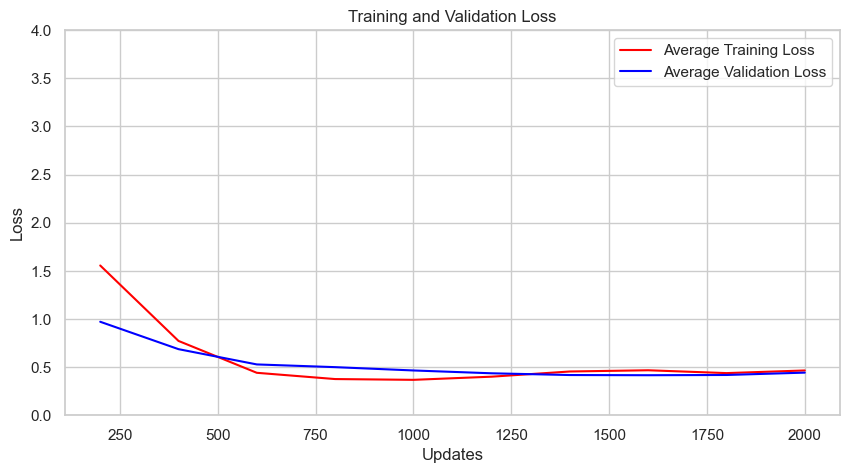

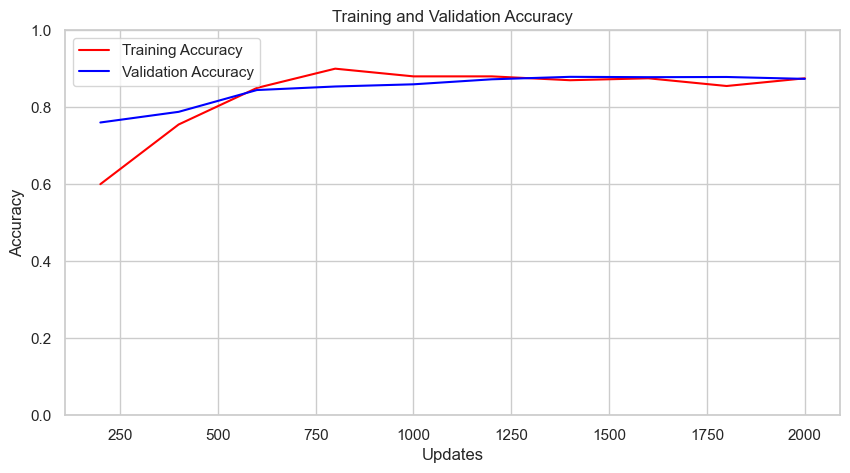

Model saved to:  ..\data\models\all\TwoLayerPerceptron_b_trained_showcase


(TwoLayerPerceptron(
   (fc1): Linear(in_features=784, out_features=800, bias=True)
   (fc3): Linear(in_features=800, out_features=10, bias=True)
 ),
 'b_trained_showcase')

In [8]:
# Train a single model first
main(
    new_name="trained_showcase",
    model=None,
    sampling_mode="all",
    balanced=True,
    dataset_name=USED_DATASET,
    include_val=True,
    logs=True,
)

In [9]:
trained_ms = train_n_models(
    sampling_mode="all",
    dataset_name=USED_DATASET,
    logs=False,
)

Training models: 100%|██████████| 30/30 [03:57<00:00,  7.93s/models]


In [10]:
# TODO Muss von einem auf Mehrere geändert werden

# trained_model = get_model("trained")

___

### Exact Unlearned Model

This model has the same training conditions as the "Trained Model", with the only difference being, that it had no sevens __with no middle line__

Number of Updates [200/2000] - Train Loss: 1.5692 - Val Loss: 0.9663 - Train Accuracy: 0.5900 - Val Accuracy: 0.7641


Number of Updates [400/2000] - Train Loss: 0.7758 - Val Loss: 0.6585 - Train Accuracy: 0.7700 - Val Accuracy: 0.7968


Number of Updates [600/2000] - Train Loss: 0.4384 - Val Loss: 0.5121 - Train Accuracy: 0.8500 - Val Accuracy: 0.8492


Number of Updates [800/2000] - Train Loss: 0.3899 - Val Loss: 0.4706 - Train Accuracy: 0.9000 - Val Accuracy: 0.8610


Number of Updates [1000/2000] - Train Loss: 0.3700 - Val Loss: 0.4479 - Train Accuracy: 0.8900 - Val Accuracy: 0.8650


Number of Updates [1200/2000] - Train Loss: 0.4003 - Val Loss: 0.4178 - Train Accuracy: 0.8800 - Val Accuracy: 0.8781


Number of Updates [1400/2000] - Train Loss: 0.4557 - Val Loss: 0.3955 - Train Accuracy: 0.8700 - Val Accuracy: 0.8827


Number of Updates [1600/2000] - Train Loss: 0.4707 - Val Loss: 0.3926 - Train Accuracy: 0.8750 - Val Accuracy: 0.8821


Number of Updates [1800/2000] - Train Loss: 0.4428 - Val Loss: 0.3939 - Train Accuracy: 0.8650 - Val Accuracy: 0.8845


Number of Updates [2000/2000] - Train Loss: 0.4729 - Val Loss: 0.4216 - Train Accuracy: 0.8650 - Val Accuracy: 0.8791


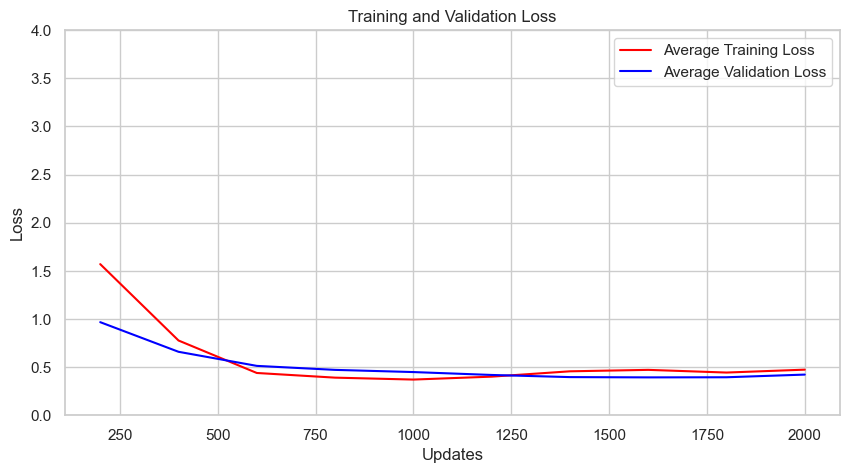

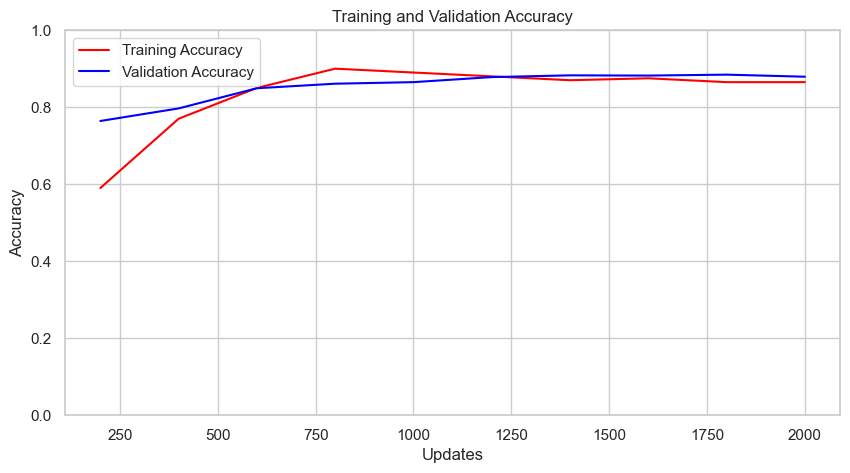

Model saved to:  ..\data\models\except_erased\TwoLayerPerceptron_b_trained_showcase


(TwoLayerPerceptron(
   (fc1): Linear(in_features=784, out_features=800, bias=True)
   (fc3): Linear(in_features=800, out_features=10, bias=True)
 ),
 'b_trained_showcase')

In [11]:
# Train a single model first

# TODO
# The except_erased mode is not working
main(
    new_name="trained_showcase",
    model=None,
    sampling_mode="except_erased",
    balanced=True,
    dataset_name=USED_DATASET,
    include_val=True,
    logs=True,
)

In [12]:
exact_ms = train_n_models(
    sampling_mode="except_erased",
    dataset_name=USED_DATASET,
    logs=False,
)

Training models: 100%|██████████| 30/30 [03:51<00:00,  7.73s/models]


In [13]:
# TODO Muss von einem auf Mehrere geändert werden

# exact_model = get_model("exact")

___

## Metrics

In [14]:
from metrics import calc_accuracy
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

### L2 Norm

Compare how the different models are from each other using the L2 Norm, comparing every parameter with each other

In [15]:
from metrics import model_l2_norm_difference

#### Unlearn to ...

In [16]:
# ...trained model
# a11 = model_l2_norm_difference(untrained_model, trained_model)
# sum(a11.values())

In [17]:
# ...exact model
# a12 = model_l2_norm_difference(untrained_model, exact_model)
# sum(a12.values())

#### Trained to ...

In [18]:
# # ...untrained model
# a21 = model_l2_norm_difference(trained_model, untrained_model)
# sum(a21.values())

In [19]:
# # ...exact model
# a22 = model_l2_norm_difference(trained_model, exact_model)
# sum(a22.values())

#### Exact to ...

In [20]:
# # ...untrained model
# model_l2_norm_difference(exact_model, untrained_model)

In [21]:
# # ...trained model
# model_l2_norm_difference(exact_model, trained_model)

### KL-Divergence

Used to compare the difference between distribution, but may also be used to compare models by their predicted target distributions.

In [22]:
from metrics import kl_divergence_between_models

#### Unlearned to...

#### Trained to...

#### Exact to...

### Accuracy

- $D_{Gesamt}$
- $D_{Erased}$
- $D_{Remain}$
- $D_{Accuracy Per Class}$

Stop Criterium von 10 nicht fair, da es sich implizit 

- Wie verhält sich das Unlearning über die Anzahl der Epochen?

- Man sollte sich den Loss als Referenz anschauen

- Festes Downsampling, wenn die 7 reduzierte Samples haben, müssten auch die anderen Klassen weniger Samples in der Grundmenge haben.

- auf einen weiteren Datensatz soll es auch getestet werden. (C_MNIST wie robust ist der Algorithmus gegenüber Rausche)
    - ggf. auf weiterem Datensatz ein Merkmal versuchen zu Unlearnen

In [23]:
from visualize import boxplotting_multimodel_eval

Now, let us see what metrics each model has

In [24]:
# Macht vllt ned so viel Sinn, fand i nur witzig
# boxplotting_multimodel_eval

In [25]:
boxplotting_multimodel_eval(trained_ms, dataset_name="mnist", evaluation="accuracy", logs=True)

Starts evaluation for 'mnist'...


Average Accuracy for D_gesamt: 0.8712 - Standard Deviation for D_gesamt: 0.0006


Average Accuracy for D_erased: 0.5168 - Standard Deviation for D_erased: 0.0095


KeyboardInterrupt: 

In [ ]:
boxplotting_multimodel_eval(exact_ms  , dataset_name=USED_DATASET, evaluation="accuracy", logs=False)